In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from lib import NaiveBayesClassifier

directories = ['messages/part1',
               'messages/part2',
               'messages/part3',
               'messages/part4',
               'messages/part5',
               'messages/part6',
               'messages/part7',
               'messages/part8',
               'messages/part9',
               'messages/part10']

In [2]:
def draw_roc():
    y_train = []
    X_train = []
    for dir in directories:
        for filename in os.listdir(dir):
            if 'spm' in filename:
                file = open(dir + '/' + filename, "r")
                subject = list(file.readline().split())[1:]
                file.readline()
                text = list(file.readline().split())

                X_train.append(subject + text)
                y_train.append(0)
            else:
                file = open(dir + '/' + filename, "r")
                subject = list(file.readline().split())[1:]
                file.readline()
                text = list(file.readline().split())

                X_train.append(subject + text)
                y_train.append(1)

    clf = NaiveBayesClassifier(X_train, y_train, 2, 1, 0.1)
    clf.fit()
    xs, ys = clf.roc_data()
    plt.plot(xs, ys)

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

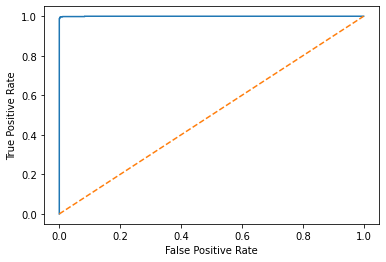

In [3]:
draw_roc()

In [7]:
def cross_val_score(n_gram, alpha, penalty):
    accuracy = 0
    for i in range(10):
        test_dir = directories[i]
        X_train = []
        y_train = []
        
        X_test = []
        y_test = []
        for dir in directories:
            if dir == test_dir:
                continue
            for filename in os.listdir(dir):
                if 'spm' in filename:
                    file = open(dir + '/' + filename, "r")
                    subject = list(file.readline().split())[1:]
                    file.readline()
                    text = list(file.readline().split())

                    X_train.append(subject + text)
                    y_train.append(0)
                else:
                    file = open(dir + '/' + filename, "r")
                    subject = list(file.readline().split())[1:]
                    file.readline()
                    text = list(file.readline().split())

                    X_train.append(subject + text)
                    y_train.append(1)
        n_legit = 0
        for filename in os.listdir(test_dir):
                if 'spm' in filename:
                    file = open(test_dir + '/' + filename, "r")
                    subject = list(file.readline().split())[1:]
                    file.readline()
                    text = list(file.readline().split())

                    X_test.append(subject + text)
                    y_test.append(0)
                else:
                    n_legit += 1
                    file = open(test_dir + '/' + filename, "r")
                    subject = list(file.readline().split())[1:]
                    file.readline()
                    text = list(file.readline().split())

                    X_test.append(subject + text)
                    y_test.append(1)
        clf = NaiveBayesClassifier(X_train, y_train, 2, n_gram, alpha, penalty)
        clf.fit()
        pr = clf.predict(X_test)
        acc = 0
        for j in range(len(y_test)):
            p = np.argmax(pr[j])
            if p == y_test[j]:
                if p == 1:
                    n_legit -= 1
                acc += 1
            else:
                if y_test[j] == 1:
                    print(pr[j])
        acc /= len(y_test)
        accuracy += acc
        print("Step", i, "Accuracy:", acc, "Missed legit:",n_legit)
    return accuracy / 10
            


In [11]:
cross_val_score(n_gram=1, alpha=0.1, penalty=[1, 1e30])

Step 0 Accuracy: 0.8623853211009175 Missed legit: 0
Step 1 Accuracy: 0.8256880733944955 Missed legit: 0
Step 2 Accuracy: 0.8165137614678899 Missed legit: 0
Step 3 Accuracy: 0.8440366972477065 Missed legit: 0
Step 4 Accuracy: 0.7798165137614679 Missed legit: 0
Step 5 Accuracy: 0.7889908256880734 Missed legit: 0
Step 6 Accuracy: 0.8623853211009175 Missed legit: 0
Step 7 Accuracy: 0.8256880733944955 Missed legit: 0
[9.99999996e-01 4.40164206e-09]
Step 8 Accuracy: 0.7889908256880734 Missed legit: 1
Step 9 Accuracy: 0.8165137614678899 Missed legit: 0


0.8211009174311925

In [14]:
cross_val_score(n_gram=1, alpha=0.1, penalty=[1, 1.5e30])

Step 0 Accuracy: 0.8623853211009175 Missed legit: 0
Step 1 Accuracy: 0.8256880733944955 Missed legit: 0
Step 2 Accuracy: 0.8165137614678899 Missed legit: 0
Step 3 Accuracy: 0.8440366972477065 Missed legit: 0
Step 4 Accuracy: 0.7798165137614679 Missed legit: 0
Step 5 Accuracy: 0.7889908256880734 Missed legit: 0
Step 6 Accuracy: 0.8623853211009175 Missed legit: 0
Step 7 Accuracy: 0.8256880733944955 Missed legit: 0
[9.99999993e-01 6.60246308e-09]
Step 8 Accuracy: 0.7889908256880734 Missed legit: 1
Step 9 Accuracy: 0.8165137614678899 Missed legit: 0


0.8211009174311925

In [13]:
cross_val_score(n_gram=1, alpha=0.1, penalty=[1, 1e40])

Step 0 Accuracy: 0.8348623853211009 Missed legit: 0
Step 1 Accuracy: 0.7981651376146789 Missed legit: 0
Step 2 Accuracy: 0.8073394495412844 Missed legit: 0
Step 3 Accuracy: 0.7981651376146789 Missed legit: 0
Step 4 Accuracy: 0.7706422018348624 Missed legit: 0
Step 5 Accuracy: 0.7614678899082569 Missed legit: 0
Step 6 Accuracy: 0.8532110091743119 Missed legit: 0
Step 7 Accuracy: 0.8256880733944955 Missed legit: 0
Step 8 Accuracy: 0.7614678899082569 Missed legit: 0
Step 9 Accuracy: 0.7706422018348624 Missed legit: 0


0.7981651376146789

In [12]:
cross_val_score(n_gram=1, alpha=0.1, penalty=[1, 1e50])

Step 0 Accuracy: 0.7706422018348624 Missed legit: 0
Step 1 Accuracy: 0.7798165137614679 Missed legit: 0
Step 2 Accuracy: 0.7706422018348624 Missed legit: 0
Step 3 Accuracy: 0.7706422018348624 Missed legit: 0
Step 4 Accuracy: 0.7522935779816514 Missed legit: 0
Step 5 Accuracy: 0.7247706422018348 Missed legit: 0
Step 6 Accuracy: 0.8165137614678899 Missed legit: 0
Step 7 Accuracy: 0.7798165137614679 Missed legit: 0
Step 8 Accuracy: 0.7522935779816514 Missed legit: 0
Step 9 Accuracy: 0.7339449541284404 Missed legit: 0


0.7651376146788992

------------

In [15]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 1e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999999e-01 5.43715883e-10]
Step 8 Accuracy: 0.8165137614678899 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.8577981651376148

In [16]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 1.5e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999999e-01 8.15573825e-10]
Step 8 Accuracy: 0.8165137614678899 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.8577981651376148

In [17]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 2e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999999e-01 1.08743177e-09]
Step 8 Accuracy: 0.8165137614678899 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.8577981651376148

In [18]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 3e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999998e-01 1.63114765e-09]
Step 8 Accuracy: 0.8165137614678899 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.8577981651376148

In [19]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 4e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999998e-01 2.17486353e-09]
Step 8 Accuracy: 0.8073394495412844 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.856880733944954

In [27]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 100])

Step 0 Accuracy: 0.963302752293578 Missed legit: 0
Step 1 Accuracy: 0.9541284403669725 Missed legit: 0
Step 2 Accuracy: 0.944954128440367 Missed legit: 0
Step 3 Accuracy: 0.981651376146789 Missed legit: 0
Step 4 Accuracy: 0.944954128440367 Missed legit: 0
[9.99999996e-01 3.63239372e-09]
Step 5 Accuracy: 0.9357798165137615 Missed legit: 1
[0.98741529 0.01258471]
Step 6 Accuracy: 0.963302752293578 Missed legit: 1
Step 7 Accuracy: 0.963302752293578 Missed legit: 0
[1.00000000e+00 5.43715884e-38]
[1.00000000e+00 1.08349053e-16]
[0.99892118 0.00107882]
Step 8 Accuracy: 0.9357798165137615 Missed legit: 3
Step 9 Accuracy: 0.981651376146789 Missed legit: 0


0.9568807339449542

In [21]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 6e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999997e-01 3.26229529e-09]
Step 8 Accuracy: 0.8073394495412844 Missed legit: 1
Step 9 Accuracy: 0.8899082568807339 Missed legit: 0


0.856880733944954

In [22]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 7e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999996e-01 3.80601117e-09]
Step 8 Accuracy: 0.8073394495412844 Missed legit: 1
Step 9 Accuracy: 0.8807339449541285 Missed legit: 0


0.8559633027522935

In [23]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 8e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999996e-01 4.34972705e-09]
Step 8 Accuracy: 0.8073394495412844 Missed legit: 1
Step 9 Accuracy: 0.8807339449541285 Missed legit: 0


0.8559633027522935

In [24]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 9e30])

Step 0 Accuracy: 0.8807339449541285 Missed legit: 0
Step 1 Accuracy: 0.8532110091743119 Missed legit: 0
Step 2 Accuracy: 0.8807339449541285 Missed legit: 0
Step 3 Accuracy: 0.8899082568807339 Missed legit: 0
Step 4 Accuracy: 0.8073394495412844 Missed legit: 0
Step 5 Accuracy: 0.8256880733944955 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8623853211009175 Missed legit: 0
[9.99999995e-01 4.89344293e-09]
Step 8 Accuracy: 0.8073394495412844 Missed legit: 1
Step 9 Accuracy: 0.8807339449541285 Missed legit: 0


0.8559633027522935

In [25]:
cross_val_score(n_gram=1, alpha=0.001, penalty=[1, 1e40])

Step 0 Accuracy: 0.8715596330275229 Missed legit: 0
Step 1 Accuracy: 0.8348623853211009 Missed legit: 0
Step 2 Accuracy: 0.8348623853211009 Missed legit: 0
Step 3 Accuracy: 0.8623853211009175 Missed legit: 0
Step 4 Accuracy: 0.7981651376146789 Missed legit: 0
Step 5 Accuracy: 0.7889908256880734 Missed legit: 0
Step 6 Accuracy: 0.8715596330275229 Missed legit: 0
Step 7 Accuracy: 0.8440366972477065 Missed legit: 0
Step 8 Accuracy: 0.7981651376146789 Missed legit: 0
Step 9 Accuracy: 0.8256880733944955 Missed legit: 0


0.8330275229357799

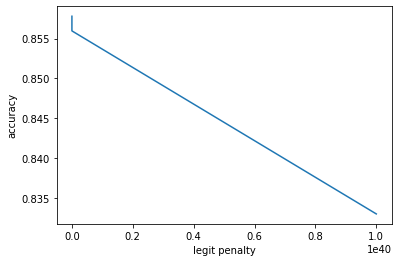

In [30]:
legit_penalty = [100, 1e30,4e30,7e30,1e40]
accuracy = [0.9568807339449542,0.8577981651376148,0.856880733944954,0.8559633027522935,0.8330275229357799]
legit_penalty = [1e30,4e30,7e30,1e40]
accuracy = [0.8577981651376148,0.856880733944954,0.8559633027522935,0.8330275229357799]
plt.plot(legit_penalty, accuracy)
plt.xlabel('legit penalty')
plt.ylabel('accuracy')
plt.show()